# Hidden Markov Model for Phonotactics

This spring, I spent three weeks building a Hidden Markov Model for a class in computational linguistics, and it's a project robust enough to spend some time explaining.

## Background

In broad strokes, one of the main shifts in linguistics since Chomsky is a movement toward computation and statistical methods. 

The field of linguistics, as evidenced by the proceedings of most of my interactions after I announce that I hold a degree in it, is not particularly well-understood, even by linguists. One way that I explain this is that the field itself is at a strange junction of disciplines: much as I might protest the classification, linguistics is not considered part of STEM. It's "further out" than even economics, because it doesn't have a singular paradigm to point to. And I think this is what makes the field so interesting: as an almost-humanistic science, linguistics gets to play the game of trying to figure out what mold it's going to force the human being into in order to create an object for its studies.

The foremost task of the linguist is, or ought to be, to determine whether or not we're even asking good questions about language in the first place. Language is the house of being, after all: it's always a little bit large than we are, and we can't even try to understand it without using it. And this leads to one of the crucial political problems within the field right now: big data. The statistician, the data scientist, and the software engineer come from a totally different lineage than the formal linguist. They look for patterns, build products, and invest the economic profits into R&D. Coding interviews are explicitly about breaking down problems into known methods and engineering one's way through the unknown. And I love it, don't get me wrong - machine learning and information processing more generally are absolutely the future of scientific praxis. These methods have and will continue to produce great experiments. But this is the tension inherent in doing computational linguistics: we're trying to get things conceptually right, not only statistically likely. Models have to be selected for qualitative reasons before they can be tested. After all, testing can only tell you if you found what you were looking for.

The task here, as articulated by a number of my professors, is to rebrand linguistics as the "data science of language." This is somewhat appealing because of the uniue position language takes in our own being. We can't have a human experience that isn't mediated through language at least implicitly. So, while it's entirely appropriate to attack text with any statistical model we have, I maintain that it's philosophically important to understand how we think the text got there.

In the case of looking at English prose, we think the text came from the mental processes of an English speaker. Now, in the Chomskyian tradition, we would want to look at the "average competent speaker in a neutral setting" - the linguistic version of the physics problem involving a spherical chicken in a vacuum - in order to build a "descriptively adequate grammar," that is, a minimum-length description of linguistic competence. (For the computer scientist, this means presenting an algorithm to bound the Kolmogorov complexity of a given phenomenon, which I've done in my thesis). But Chomsky, back in 1968, intended a live linguistic being as an informant. The shift in praxis toward computation allows us to try to make inferences from a corpus of the speaker's language usage rather than from interpersonal inquiry.

## Our Model of Language

One of the most important assumptions in the history of phonology is the phoneme: a symbolic, semantically meaningless, and discrete unit that concatenates to form words and enjoys a psychological reality prior to and distinct from the sounds made to render it. Unsurprisingly, the psychic reality of the entity has been a hotly debated topic in the history of linguistics - I'm personally a strong realist after reading Edward Sapir's essay on the topic - and the insight of the symbolic and discrete minimal unit is nonetheless vastly influential. Notably, Claude Levi-Strauss and Jacques Lacan used it as the conceptual keystone of their work in structural anthropology and psychoanalysis. Today it allows us to exploit a homology between speech and gene transcription: both involve the production of a complex organic phenomenon from information stored in a string of symbols. 

For the sake of philsophical correctness, then, it's important to highlight this: when we look at English text, we believe that the symbols on the page are actually renditions of strings of psychically real symbols arranged according to psychologically real rules of syntax and morphology. Those fields of linguistics, sadly, are beyond my own expertise. 

Here's an overview of the model to which I subscribe:

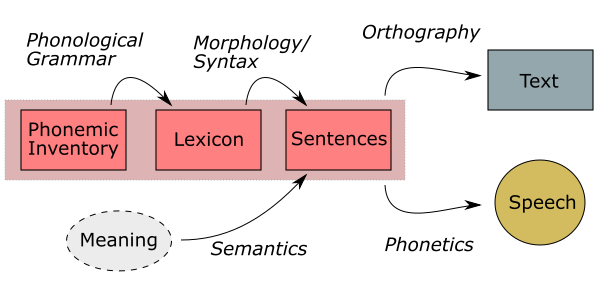

The three red boxes are collections of strings of phonemes. Importantly, so far as we know, these are psychologically real units. We can do empirical research on, say, recall time of various words, and the contents of the lexicon present themselves robustly in experimental psychology. The box labeled "text" is importantly a collection of symbols in a script, not phonemes (hence the different color). There is a not-necessarily-bijective correspondence between the two. The atrocity that is English spelling conventions should testify to this fact. The circle labeled "speech" should be self-explanatory. Note that, on this view, text-to-speech or speech-to-text technology will be tasked with inverting one of the mappings "orthography" or "phonetics," even if this is done implicitly. Note also that the difference between our computational approach and the "traditional" approach is here merely reduced to attacking a different node in a directed graph, but that this belies substantial practical differences.

(A final, somewhat pedantic clarification: the mappings on the box "sentences" are imprecise. Strings of morphemes have to go through a process of phonological alternation before a final string of phonemes is produced, but it's unsettled as to exactly how the concatenation of morphemes interfaces with the rewriting of the full phrase. It's also no necessarily the case that morphemes are made of the same phonemes as appear after phonological rewrite, and some models might involve an alphabet of phonemes in addition to an alphabet of so-called "archiphonemes" that comprise a different representation for lexical morphemes.)

I'll reiterate that this isn't an engineering project here; it's a low-resolution model of a paticular phenomenon. We know merely from introspection that sentences are made of words and that the literal meanings of sentences we speak don't vary based on, for instance, our auditory production of them or on trivial typos. Now, certainly this simplifies away language acquisition and pragmatics and world-knowledge and all that jazz, but so does most contemporary AI.

So what we intend to investigate is this orthography mapping. In particular, we believe in what a phonologist calls an "surface form" - a string of phonemes that gets rendered into either text or speech (or signing, whistling, etc.) - and we can use this postulate to influence our choice of model class. Chomsky himself endorsed using a loss function (he used the term "evaluation metric" in "Aspects of the Theory of Syntax") to select an optimal model, and so the task of phoneme inference is indeed, if adapted from foundational postulates of linguistics, properly a machine learning task.


## Frequency, Acceptability, and Grammaticality

Again, the adaptation is substantial. For Chomsky, a grammar's evaluation metric is description length and the method of achieving it is retrieving grammaticality judgments on various reserahcer-curated data from as many live informants as necessary. This naturally results in a workflow where many linguists will tell you that they "live in the exceptions." For instance, a challenge in English phonology is what's called the rule of trisyllabic shortening: when have the word <serene\> and the word <serenity\>, we see that the second vowel shortens and remains stressed. But there are exceptions to this, like <nightingale\>. It gets ore complicated, and becomes a motivating issue for a research program called Lexical Phonology. (More data [here](http://people.cs.uchicago.edu/~jagoldsm/slides/2016-phono-lexical.pdf).) The upshot is that a few choice examples and thousands of hours of introspection are what motivate traditional formal linguistic praxis.

In contrast, the computational linguist lives in the corpus. From the text one has to infer a grammar that could have produced it, and without getting any new information from probing exceptions. Instead, we're reduced to analyzing frequencies of given features simply because it's the only thing we can do. Of course, even this is deceptive, because a computer does not _a priori_ know what features are. Give a machine an English corpus and it only "sees" binary - inferring even that the corpus is "in English" is already a challenging task. Thus, I find it important to remember that even by stipulating that we're looking for language features, we're already importing substantial priors to the task.

But we really have to remember that frequency and grammaticality are not the same thing. For instance, Sanskrit has ten vowels (five qualities, and long and short are distinct) but in the corpus a full eighty percent of vowel phoneme occurrences are short /a/. The distribution of vowels in Sanskrit is a very hady fingerprint for the corpus, as it turns out, but it can't really tell us in itself what's grammatical. One is certainly justified in claiming that things that aren't grammatical should occur with zero frequency, but even this might not be the case. Suppose we're counting occurence of words in an English corpus. It's entirely possible that typos like <teh\>, or possibly loanwords with strange spelling, are going to occur actually with greater frequency than grammatical words that occur uniquely. And, of course, the computer does not know about such things. 

But okay, supposing the corpus is totally clean phonemic transcription from before 2015, compare the word <meh\> with the word <squanch\>. The former is actually a phonological exception in English - it ends in a lax vowel unlike any other word in the language - and the latter does not yet have widely-accepted meaning or usage but is totally valid on a strictly phonological level. Here's "squanch" on Google Trends:

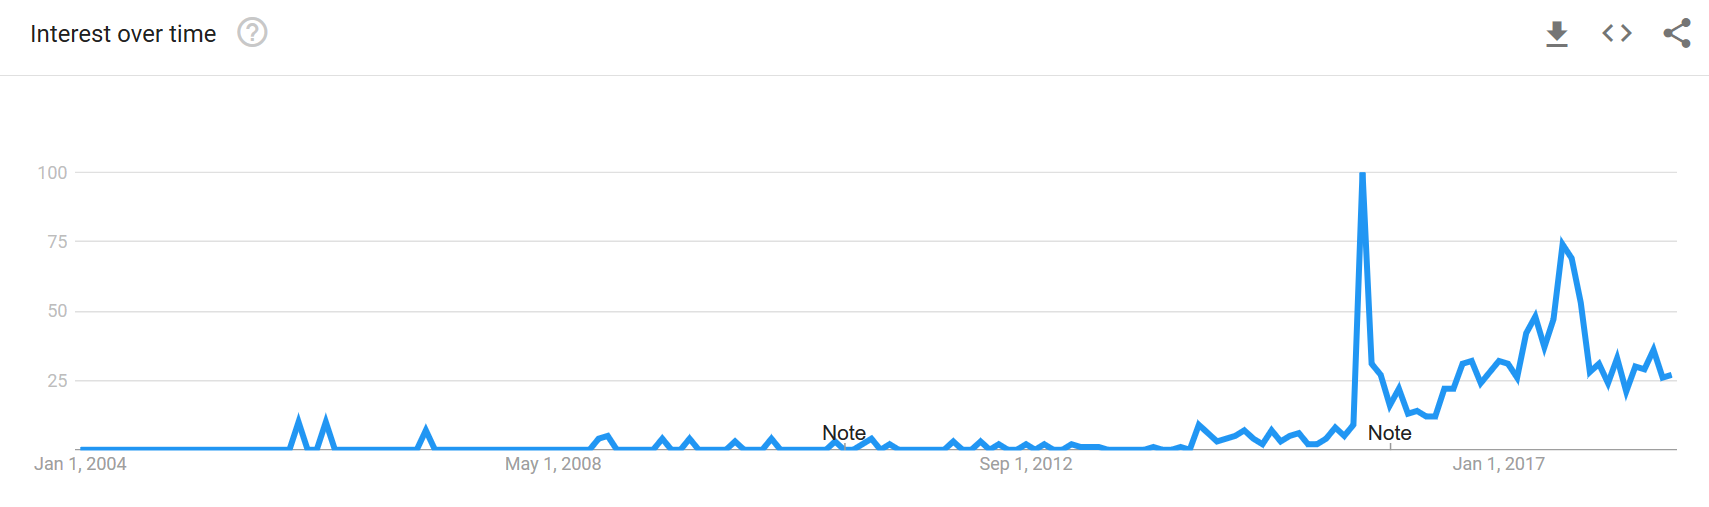


Indeed, it will have zero frequency in almost any corpus from before 2015 (apparently except for some minor coinages, which should attest to its validity) but should ideally be counted as more valid in the phonological grammar than "meh," which has high frequency in many corpora. Here's Google Trends comparing the two words ("meh" is blue): 

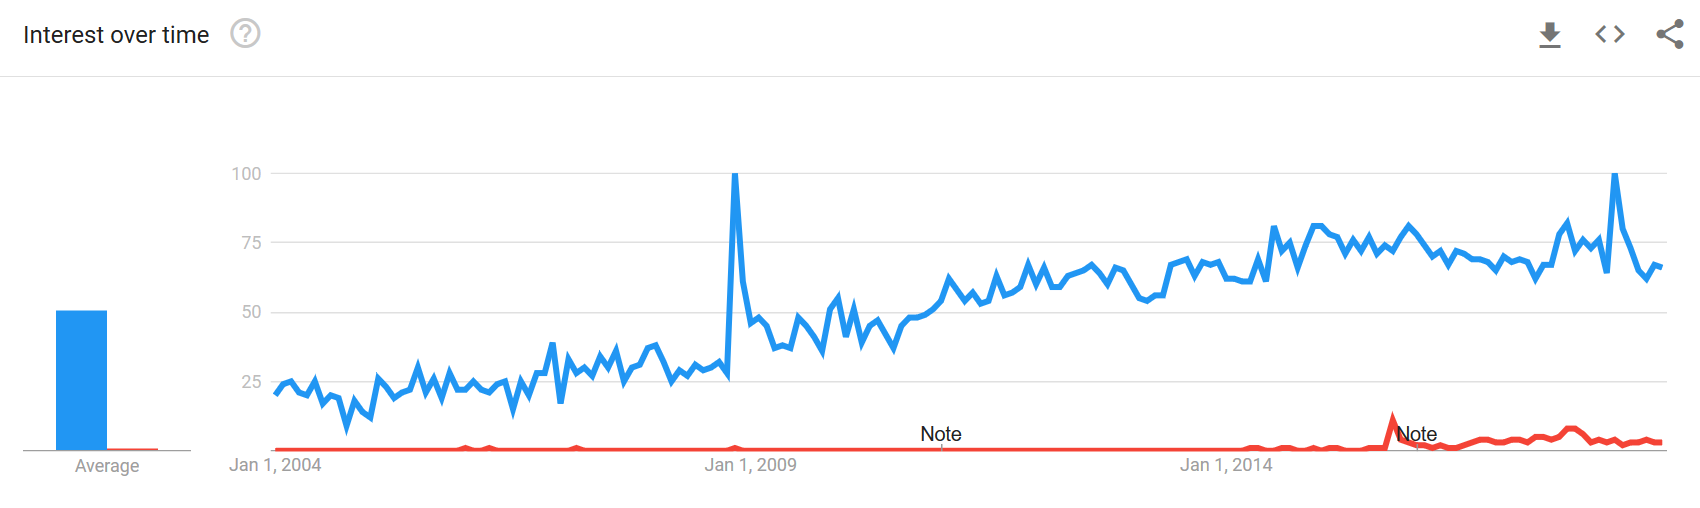

This should actually be a familiar concept from machine learning and I think is an interesting perspective on language: we're trying to learn a grammar, which is a classifier function $G : \Sigma^* \rightarrow \{ 0, 1 \}$, where $\Sigma$ is the phonemic inventory. Now, obviously phonemic inventories vary across languages and it's still unclear how to get a universal theory of phonemes, but regardless, presuming that every language works on a subset of some universal phonemic alphabet, the task of grammar inference is spelled out for us. Every language has both a grammar and a corpus, and the corpus constitutes noisy training data for the grammar. 

Now, Chomsky has long espoused a principle called "Paucity of Evidence" where children can learn from this noisy corpus of natural language astonishingly quickly. That is, in oversimplified ML terms, the learning rate is much higher than one might expect from pure unsupervised learning. Human beings must be acquiring language through a model-based approach, and the task of the linguist is to speculate about this model. (It's referred to as Universal Grammar, or UG.) Therefore the task of the computational linguist in particular, is, to come full circle, one of model selection.

The takeaway here is the usual parable that language is always a little larger than we are. I've demonstrated that, in order to avoid serious errors, frequency analysis must be supplemented by priors that come essentially from our own linguistic _a priori_. The idea of a distinction between competence (grammar) and performance (corpus) goes all the way back to Chomsky's early publications, and it can be helpfully rephrased in terms of machine learning. Now, is our task here or in general actually the construction of a phonological grammar for English? Not necessarily. But it's important nonetheless to respect in any language-related task that there's deep structure to the data and that we can directly glimpse this structure through our own intuitions as speakers. Moreover, the corpus and the grammar have a very complex interdependency and it's difficult but valuable to try to keep the full complexity in view. This is my personal excitement for computational linguistics, and I hope I can share it with the world.

## Modeling Phonology

Now, there's one other key ingredient: we know that phonology is regular. That is, rules for sound production can only be local. To see this, read any descriptive grammar of sny natural language. You'll more likely than not find a bunch of what linguists call "rewrite rules" - things like "/s/ becomes /z/ after a voiced consonant, e.g. <cats\> versus <dogs\>" - which are just regular expressions in disguise. That linguistics should be so intimately tied with formal language theory is not particularly surprising in light of the fact that regular languages exist on the _Chomsky_ hierarchy.

The regularity of phonology allowed the rise of finite-state transducer models for computational linguistics, which is a wonderful thing to geek out about. The Xerox Research Center in Palo Alto produced, in the eighties, a full-fledged program for building and evaluating rewrite-rule regular grammars of various languages. Though the technology never made it to market and never even changed research praxis in phonology, it got me excited enough to build a similar model in my thesis.

Now, what's important about regularity is that it means we're not unjustified in choosing a Markovian process to perform our frequency analysis. When we implement the HMM, it's only going to look at bigram frequencies, which won't even be enough to infer a regular grammar, but at the very least we know that any local properties it misses will actully be local rather than arbitrarily high up a syntax tree. If you subscribe to an autosegmental theory of phonology, as I do, locality might exist on multiple strata - for instance, tonality in East African languages has segments that extend well beyond individual phonemes. This is no issue: just run a model on each stratum.

In sum, we are justified in trying to apply local-only models to phonology. To wit, we can bring in the HMM.

## Hidden Markov Model

The Hidden Markov Model is a Gaussian mixture model that operates on categorical data. (In this case, our categorical data are the observed characters in the corpus.) An HMM supposes that each observed symbol is actually some other, "hidden" symbol. Given a string of observed symbols, then, there should exist a "hidden" string that the observations are actually a manifestation of. The HMM is associated with three main tasks:

* Given an observed string, estimate its probability of occurrence; 
* Given an observed string, compute the most likely hidden string that would produce it;
* Given a corpus of observed strings, unsupervisedly learn the probability of assignment between hidden and observed states. 

We choose to use this model for phonology because we know each character is underlyingly a phoneme, and we can use the unsupervised learning feature of the model to put real quantitative strength to grammatical predictions about the corpus. For instance, at the most basic, we know that English has two categories of letters - consonants and vowels - and this is a pretty easy thing to determine from introspection. A Hidden Markov Model told only that there are two categories of symbol, if it can determine this distribution from the tendency of English words not to cluster vowels but to sometimes cluster consonants, will put some numbers to this intuition. 

So we'll choose separating consonants from vowels as our starting task. To investigate the three problems, let's define exactly what the HMM is. Imagine that the interface between "sentences" and "text" in the above diagram is a bit collapsed and viewed from the following perspective:

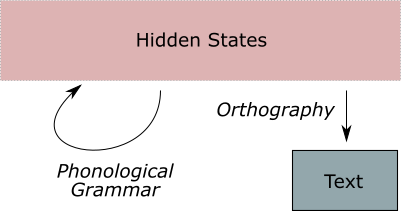

Then the HMM is a hypothesis about the box of hidden states to which we will ultimately assign a probability based on how well it predicts the corpus. Now suppose we look at an individual string in the text box and the corresponding underlying string in the hidden states box (graphic taken from user Hakeem.gadi on Wikimedia Commons):

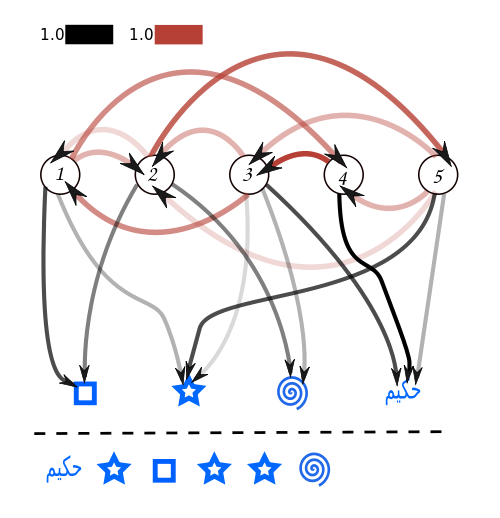

The model directly contains, in its distributions, the probability of each hidden state succeeding each other hidden state and the probability of each hidden state emitting each observed state. We can directly use these distributions to solve the first of the three problems: if $w$ is our observed word with length $k$, we can take each possible $k$-long string of hidden states and figure out its probability of emitting $w$ and simply sum over the whole set. This will be done in a later section. Additionally, we can see how using Bayes's rule to take the string $w$ as an observation immediately allows us to compute the most likely underlying string that could hae produced it, given the distributions in the model, and well also do this.

But notice that neither of those two problems will tell us much about consonats and vowels until we've actually trained the model. This is a little more difficult to explain, and it will involve solving the first problem iteratively. For what I take as useful visual intuition, consider an analogous unsupervised learning task: k means clustering. In this task, we're given data in Euclidean space (say $\mathbb{R}^2$) and we decide we want $k$ clusters from it (in the below example, say $k = 3$). The algorithm, somewhat counterintuitively, _randomly assigns_ initial values for the mean points of each cluster and then computes the [Voronoi diagram](https://en.wikipedia.org/wiki/Voronoi_diagram) of the space, i.e. determines for each mean point $m$ which of the points $x$ is closest to $m$ among all mean points. From these newly-estimated clusters, new means are computed and the process repeats iteratively. Here we see an animation of the process (taken from user Chire on Wikimedia Commons):

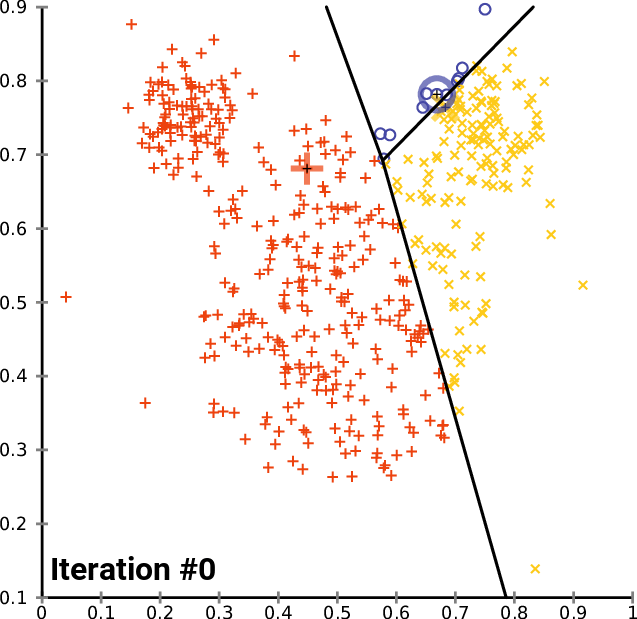

What happens, as we notice, is that the algorithm will eventually terminate. However, it's uncertain if it always terminates in the same place, but this is simply a risk we run for using noisy data: sometimes models get stuck in local extrema. On the other hand, it manages to pick out clusters pretty well despite not being told anything other than how many there are going to be.

The HMM will train itself somewhat similarly. Instead of three clusters, we'll initially look for two. And we won't be trying to actually cluster; instead, to assign the most suitable probability distributions of emission from hidden states to surface states. This process will also be iterative: instead of computing means, we'll randomly initialize the distributions and perform the analogy to re-clustering, using Bayes's rule to compute new distributions that correspond to what's observed in the corpus, then setting those as our new distributions. This gets very technical, but the iterative movement is analogous to the clustering depicted above.

Now, we're actually going to have to solve the first problem - computing word probability - before we can train the model. But before that, we need a starting distribution. And again, somewhat counter-intuitively, _any starting guess is as good as any other_. Here's the naive implementation of this:

In [3]:
import random

def distribute_random(distribution, from_states, to_states):
	for from_state in from_states:
		magnitude = 0.0
		for to_state in to_states:
			distribution[(from_state, to_state)] = random.random()
			magnitude += distribution[(from_state, to_state)]
		for to_state in to_states:
			distribution[(from_state, to_state)] /= magnitude
		

def distribute_pi(pi, from_states):
	magnitude = 0.0
	for from_state in from_states:
		pi[from_state] = random.random()
		magnitude += pi[from_state]
	for from_state in from_states:
		pi[from_state] /= magnitude

Now here's my Python implementation of the constructor for our model, keeping track of the longest word in the corpus as well as the corpus size, for convenience, and inferring $\Delta$ from the collection of all characters in the corpus:

In [4]:
verbose_flag = True
print_flag = True

class HMM():

	def __init__(self, _hidden_states, filename):
		self.A = dict()
		self.B = dict()
		self.Pi = dict()
		self.softcount = dict()
		self.hidden_states = _hidden_states
		self.corpus_name = filename
		self.word_count = 1
		self.longest = 0

		# Determine the output states from the corpus
		chars = set(['#'])
		corpus_file = open(self.corpus_name, "r")
		line = corpus_file.readline().strip('\n').lower()
		while line:
			chars |= set(line)
			self.word_count += 1
			self.longest = max(len(line), self.longest)
			line = corpus_file.readline().strip('\n').lower()
		self.output_states = sorted(list(chars))

		distribute_random(self.A, self.hidden_states, self.hidden_states)
		distribute_random(self.B, self.hidden_states, self.output_states)
		distribute_pi(self.Pi, self.hidden_states)

        # Print out the discrete distributions
		if verbose_flag:
			print "========================"
			print "==   Initialization   =="
			print "========================"

		for from_state in self.hidden_states:
			if verbose_flag:
				print "\n--\n\nCreating state " + from_state.__str__() + "\n\n"
				print "Transitions:\n"
			transition_sum = 0.0
			for to_state in self.hidden_states:
				if verbose_flag:
					print "    To state     " + to_state.__str__() + ":    " + self.A[(from_state, to_state)].__str__()
				transition_sum += self.A[(from_state, to_state)]
			if verbose_flag:
				print "\nTotal: " + transition_sum.__str__()
				print "\n\nEmissions:\n"
			emission_sum = 0.0
			for to_state in self.output_states:
				if verbose_flag:
					print "    To letter    " + to_state.__str__() + ":    " + self.B[(from_state, to_state)].__str__()
				emission_sum += self.B[(from_state, to_state)]
			if verbose_flag:
				print "\nTotal: " + emission_sum.__str__()

		if verbose_flag:
			print "\n--\n"
			print " Starting distribution:\n"
		start_sum = 0.0
		for state in self.hidden_states:
			if verbose_flag:
				print "    For state    " + state.__str__() + ":    " + self.Pi[state].__str__()
			start_sum += self.Pi[state]
		if verbose_flag:
			print "\nTotal: " + start_sum.__str__()

We can run this on the 1000-word English corpus I've included. The following code will print out the randomly-initialized distributions decided after inferring the output symbol alphabet:

In [5]:
states = set([0, 1])
my_hmm = HMM(states, "english1000.txt")

==   Initialization   ==

--

Creating state 0


Transitions:

    To state     0:    0.340766413947
    To state     1:    0.659233586053

Total: 1.0


Emissions:

    To letter    #:    0.0630490724825
    To letter    ':    0.0549656036942
    To letter    .:    0.0219734605652
    To letter    a:    0.0235856489642
    To letter    b:    0.0492438530886
    To letter    c:    0.0106462905397
    To letter    d:    0.00870737547256
    To letter    e:    0.0643961647427
    To letter    f:    0.0576617945942
    To letter    g:    0.0134158311951
    To letter    h:    0.0065889847687
    To letter    i:    0.0433071088751
    To letter    j:    0.0234105522098
    To letter    k:    0.0487734602889
    To letter    l:    0.0698383441169
    To letter    m:    0.0424680184992
    To letter    n:    0.0670732127722
    To letter    o:    0.00428250938838
    To letter    p:    0.0169667284561
    To letter    q:    0.029721236595
    To letter    r:    0.00767583008246
    To letter 

## Estimating String Probability: Forward Method

Now, we can use the random distribution to start estimating the probabilities of hypothesized strings. It'd be nice to unravel the probability of a word in terms of the conditional probabilities of its characters, i.e. $P(w) = P(w_1)P(w_2\mid w_1)...P(w_k\mid w_1...w_{k-1})$ but we don't actually have these probabilities. We only know the probabilities of transition and emission. 

Instead, what we can do is observe that for a $k$-long string $w$, we've actually assigned distributions such that every hidden state $q$ has some probability of emitting each character $w_t$. Thus _any_ underlying string of $k$ states could emit $w$, and because there are only finitely many such strings, all we need do is take the following sum:

$$\hat{P}_{\theta}(w) = \sum_{S \in \Sigma^k} \hat{P}_{\theta}(S) \hat{P}_{\theta}(w \mid S)$$

That is, the probability of $w$ is simply the sum of probabilities where each $S$ occurs and $S$ also emits $w$. So we have to compute the probability of each hidden string and then the probability of emission. Recall that the model explicitly gives us the emission probabilities - that much is simple. The probability given $S$ of seeing $w$ is simply

$$\hat{P}_{\theta}(w \mid S) = \prod_{t \leq k} B(q_t, w_t)$$

Now, to compute the probability of a hidden string $S$ is possible because we have implicitly defined the hidden states to have the Markov property: by keeping track only of bigram frequencies, our prediction is that the probability of seeing a state $q_1$ given previous state $q_0$ is invariant given any more information. That is, for any $S = q_0...q_k$,

$$\hat{P}_{\theta}(q_k \mid q_{k-1}) = \hat{P}_{\theta}(q_k \mid q_{k-1}...q_0)$$

This is emphatically not the case for the words. Take a moment to think about this: the corpus itself has no guarantee of being Markovian,. Instead, we cleverly decided to model it as the nondeterministic rendition of a hidden sequence that we take _a priori_ to be Markovian. This allows us to do whatever math we want behind the scenes and to simply state at the end how probable our prediction was. 

But this goes deeper that the mere disorder of the corpus. The real reason that we couldn't compute the probability above is that the corpus is an observation, not a model, and probability is a property assigned by a researcher through a model. The corpus does not have probability, properly speaking: it has frequency. Think of any issue in natral science, like the often-deemed-improbable fact of life at all. It's meaningless to talk about the probability of an actual observation like "life exists," but it is interesting to ask "how would we build a model that assigns a meaningful probability to this fact?" 

This said, we observe that the probability of $S$ is indeed what we'd expect (recalling that $\pi$ is the initial-state distribution):

$$\hat{P}_{\theta}(S) = \hat{P}_{\theta}(q_0)\hat{P}_{\theta}(q_1 \mid q_0)...\hat{P}_{\theta}(q_k\mid q_{k-1}) = \pi(q_0) \prod_{t = 1}^k \hat{P}_{\theta}(q_t \mid q_{t-1})$$

And therefore, taking the full expression yields a formula we can actualy compute and can even understand just from looking at it.

$$\hat{P}_{\theta}(w) = \sum_{S \in \Sigma^k} \left( \pi(q_0) \prod_{t = 1}^{k} A(q_t, q_{t+1})B(q_t, w_t) \right)$$

We call this the "forward method" for computation because it moves forward in phonological "time," i.e. along the word. We're going to want to reorganize this a bit, though, to make things easier down the road. 

Consider a new probability distribution $\alpha_w(q, t)$. If we imagine, for a given word $w$, that each sequence $X$ producing $w$ is a pipe and that an original volume of 1 unit of fluid is poured through $\pi$ at time $1$, and it splits at each time according to $\theta$, then  $\alpha_w(q, t)$ represents the amount of liquid flowing through hidden state $q$ at time $t$.  That is,

$$\alpha_w(q, 1) = \pi(q); \ \ \ \ \ \alpha_w(q, t + 1) = \sum_{q' \in \Sigma} \alpha_w(q', t-1) A(q', q) B(q', w_t)$$

Then we have

$$\hat{P}_{\theta}(w) = \sum_{q \in \Sigma} \alpha_w(q, |w|)$$

Why did we do this? In effect, looking at $\alpha_w$ lets us see the partial products of the expression above. We're going to need this to recompute the initial distribution $\pi$ when it comes time to train, since $\pi$ is only sensitive to the first term in the product. It will also be instructive to see that the backward computation algorithm lines up at every time $t$, which may help visualize the notion of probability "flowing" through the model.

Below is a Python implementation of the forward algorithm:

In [23]:
def forward(hmm, word):
		# Initialize the distribution
		alpha = dict()

		# Print if flagged
		if verbose_flag:
			print "\n--\n\nComputing forward probabilities."

		# Initilize \alpha values to the initial distribution
		for state in hmm.hidden_states:
			alpha[(state, 0)] = hmm.Pi[state]

		# Moving forward, compute new alpha values from probability products
		for t in range(1, len(word) + 1):

			# Print if flagged
			if verbose_flag:
				print "\n\n    Time " + t.__str__() + ": \'" + word[t-1] + "\'"

			# Keep a running sum at each time t
			t_sum = 0.0
			# Run through posssible next states
			for to_state in hmm.hidden_states:
				alpha[(to_state, t)] = 0

				# Print if flagged
				if verbose_flag:
					print "        To state " + to_state.__str__()

				# Find the forward probability given the next letter
				for from_state in hmm.hidden_states:
					increment = alpha[(from_state, t-1)] * hmm.B[(from_state, word[t-1])] * hmm.A[(from_state, to_state)]
					alpha[(to_state, t)] += increment

					# Print if flagged
					if verbose_flag:
						print "            From state " + from_state.__str__() + ": \\alpha_w(" + from_state.__str__() + ", " + (t-1).__str__() + ") * B(" + from_state.__str__() + ", " +  word[t-1] + ") * A(" + from_state.__str__() + ", " + to_state.__str__() + ") = " + increment.__str__() 
				
				# Print if flagged
				if verbose_flag:
					print "        \\alpha_w(" + to_state.__str__() + ", " + t.__str__() + ") = " +  alpha[(to_state, t)].__str__()
				
				# Add the probability from the current state to the sum for t
				t_sum += alpha[(to_state, t)]
			
			# Print if flagged
			if verbose_flag:
				print "\n    \sum_{t \leq k} \\alpha_w(q_t, " + t.__str__() + ") = " + t_sum.__str__()

		# Print if flagged
		if verbose_flag:
			print "\n--\n\n"		
			for t in range(0, len(word)+1):
				print "Time " + t.__str__() + ":"
				for state in hmm.hidden_states:
					print "    \\alpha_w(" + state.__str__() + ", " + t.__str__() + ") = " + alpha[(state, t)].__str__()
			print "\nTotal estimated probability of word \"" + word + "\": " + sum([alpha[(state, len(word))] for state in hmm.hidden_states]).__str__()
                    
		return alpha

Recall that $\hat{P}_{\theta} = \sum_{q \in \Sigma} \alpha_w(q, k)$. We can use this with a randomly-initialized distribution to get the probability of some word:

In [25]:
forward(my_hmm, "asdfjkl")

print "\n\n--\n\n"
forward(my_hmm, raw_input("Now you enter something: "))


--

Computing forward probabilities.


    Time 1: 'a'
        To state 0
            From state 0: \alpha_w(0, 0) * B(0, a) * A(0, 0) = 0.00782585598222
            From state 1: \alpha_w(1, 0) * B(1, a) * A(1, 0) = 0.000931367529033
        \alpha_w(0, 1) = 0.00875722351125
        To state 1
            From state 0: \alpha_w(0, 0) * B(0, a) * A(0, 1) = 0.0151395997139
            From state 1: \alpha_w(1, 0) * B(1, a) * A(1, 1) = 0.000548298516245
        \alpha_w(1, 1) = 0.0156878982301

    \sum_{t \leq k} \alpha_w(q_t, 1) = 0.0244451217414


    Time 2: 's'
        To state 0
            From state 0: \alpha_w(0, 1) * B(0, s) * A(0, 0) = 0.000149141116166
            From state 1: \alpha_w(1, 1) * B(1, s) * A(1, 0) = 0.000446917775929
        \alpha_w(0, 2) = 0.000596058892095
        To state 1
            From state 0: \alpha_w(0, 1) * B(0, s) * A(0, 1) = 0.000288522661899
            From state 1: \alpha_w(1, 1) * B(1, s) * A(1, 1) = 0.000263101671238
        \alpha_w(1, 2) 

{(0, 0): 0.9737046341580932,
 (0, 1): 0.017331916493827985,
 (0, 2): 0.001293261251390781,
 (0, 3): 4.1404258210913993e-05,
 (0, 4): 5.942638230245692e-07,
 (1, 0): 0.026295365841906865,
 (1, 1): 0.032521470241431545,
 (1, 2): 0.000875509311894127,
 (1, 3): 3.836391599116447e-05,
 (1, 4): 6.045974376071025e-07}

Time for a sanity check: why, for the word "asdfjkl," are we getting values on the order of $10^{-10}\sim10^{-13}$? Well, if you think about how many possible seven-letter strings there are on an alphabet of twenty-six letters, even if the probability distribution is uniform, we an expect to get each string exactly $1.24 \cdot 10^{-10}$ of the time. So tiny probabilities, especially before we train the model at all, are entirely expected. And, actually, after training, you'd hope that "asdfjkl" is reported even more highly improbable.

## Estimating String Probability: Backward Method

Now, part of the forward-backward algorithm is the fact that we can use Bayes's theorem to take partial products in reverse. To wit, we define another probability distribution:

$$\beta_w(q, |w|) = 1, \ \ \ \ \ \ \beta_w(q, t) = \sum_{q' \in \Sigma} \beta_w(q', t+1) A(q, q') B(q, w_t)$$

Now note that, at any time $t$, for a given word $w$, the probability distributions we've just defined line up as follows:

$$ \hat{P}_{\theta}(w) = \sum_{q \in \Sigma} \alpha_w(q, t) \beta_w(q, t)$$

Quickly, here's the backward algorithm in Python:

In [ ]:
def backward(hmm, word):
		# Initialize the distribution
		beta = dict()

		# Print if flagged
		if verbose_flag:
			print "\n--\n\nComputing backward probabilities."

		for s in hmm.hidden_states:
			beta[(s, len(word))] = 1

		for t in range(len(word), 0, -1):
			
			# Print if flagged
			if verbose_flag:
				print "\n\n    Time " + t.__str__() + ": \'" + word[t-1] + "\'"
			
			# Keep a running sum at each time t
			t_sum = 0.0
			
			for from_state in hmm.hidden_states:
				# Initialize \beta
				beta[(from_state, t-1)] = 0.0

				# Print if flagged
				if verbose_flag:
					print "        From state " + from_state.__str__()

				# Find the backward probability given the last letter
				for to_state in hmm.hidden_states:
					increment = beta[(to_state, t)] * hmm.B[(from_state, word[t-1])] * hmm.A[(from_state, to_state)]
					beta[(from_state, t-1)] += increment

					# Print if flagged
					if verbose_flag:
						print "            To state " + to_state.__str__() + ": \\beta_{" + to_state.__str__() + ", " + (t+1).__str__() + "} \cdot b_{" + from_state.__str__() + ", " +  word[t-1] + "} \cdot a_{" + from_state.__str__() + ", " + to_state.__str__() + "} = " + increment.__str__() 
				
				# Add the probability from the current state to the sum for t
				t_sum += beta[(from_state, t-1)]

				# Print if flagged
				if verbose_flag:
					print "\n    \sum_{x \in X} \\beta_{x, " + t.__str__() + "} = " + t_sum.__str__()
			
		

		# Print if flagged
		if verbose_flag:
			print "\n--\n\n"
			for t in range(0, len(word)+1):
				print "Time " + t.__str__() + ":"
				for state in hmm.hidden_states:
					print "    \\beta_{" + state.__str__() + ", " + t.__str__() + "} = " + beta[(state, t)].__str__()
		return beta

And a test-run to show it lines up:

In [ ]:
word = "qwerty"

alpha = forward(my_hmm, word)
beta = backward(my_hmm, word)

print "\n--\n\nSumming over distributions at each position in the input word:\n\n"

for t in range(6):
    sum_t = 0
    for state in my_hmm.hidden_states:
        sum_t += alpha[(state, t)] * beta[state, t]
    print "P('" + word + "') at time t = " + t.__str__() + " (w_t = " + word[t] + ") is: " + sum_t.__str__()

## Expectation-Maximization

Having demonstrated the equivalence of forward and backward methods, we now can present the expectation-maximation method for training the HMM. Returning to the analogy of clustering, what we've in essence accomplished thus far is the random initialization of mean points (probability distributions) and we've defined two equivalent ways to norm vectors (compute word probabilities). What remains to be done is to compute new means from the words (reassign probability distributions). 

What we'll do at this point is compute the atomized expectations across the entire corpus: we define a function called "softcount" that gives the expectation that state $q$ will transition to state $q'$ and emit symbol $o$ at time $t$.

$$SC(q, q', o, t) = \mathbb{E}_K\left[ \alpha(q, t) A(q, q') B(q, o) \beta(q, t) \mid w_t = o \right] = \sum_{w \in K, \ w_t = o} \frac{\alpha(q, t) A(q, q') B(q, o) \beta(q, t)}{\hat{P}_{\theta}(w)} $$

In this step, we also need to determine the probability that the model assigns to the corpus. The way I do this is to take the so-called "plog" - the negative log of the probability - and use the sum of this over every word in the corpus as a performance metric for the HMM. Training will attempt to minimize this value, which (if you check all your signs) measures the failure of the model to predict the words in the corpus with full confidence. Obviously we do not want this to overfit, because the corpus is only 1000 words large.

The computation is implemented in Python below, also checking at every step that the forward and backward algorithms agree:

In [ ]:
def forward_probability(hmm, alpha, length):
		alpha_sum = 0.0
		for state in hmm.hidden_states:
			alpha_sum += alpha[(state, length)]
		return alpha_sum


def backward_probability(hmm, beta):
    beta_sum = 0.0
    for state in hmm.hidden_states:
        beta_sum += hmm.Pi[state] * beta[(state, 0)]
    return beta_sum

def expectation(hmm):
		hmm.softcount = dict()
		# Set initial values
		plog_sum = 0.0
		# Open and read file
		corpus_file = open(hmm.corpus_name, "r")
		line = corpus_file.readline().strip('\n').lower()
		if print_flag:
			print "\n\nPlogs:\n"
		while line:
			# Append endline character
			line += "#"
			
			# Compute probabilities
			alpha = forward(hmm, line)
			beta = backward(hmm, line)
			f_prob = forward_probability(hmm, alpha, len(line))
			b_prob = backward_probability(hmm, beta)
			
			# Run through the word and tabulate softcounts
			for t in range(len(line)):
				for from_state in hmm.hidden_states:
					for to_state in hmm.hidden_states:
						if (t, line[t], from_state, to_state) not in hmm.softcount:
							hmm.softcount[(t, line[t], from_state, to_state)] = 0.0	
						hmm.softcount[(t, line[t], from_state, to_state)] += (alpha[(from_state, t)] * hmm.A[(from_state, to_state)] * hmm.B[(from_state, line[t])] * beta[(to_state, t+1)]) / f_prob

			# If we have agreement on the probailities, more or less
			if (fabs(f_prob - b_prob) < 0.00001):
				plog = -1 * log(f_prob, 2)
				plog_sum += plog

				# Print if flagged
				if print_flag:
					print "plog(\"" + line + "\") = " + plog.__str__()

			else:
				print "Unacceptable probability mismatch at word " + line + ": forward (" + f_prob.__str__() + ") != backward (" + b_prob.__str__() + ")."	
			line = corpus_file.readline().strip('\n').lower()
		
		# Print if flagged
		if print_flag:
			print "\n--\n\nSum of positive logs: " + plog_sum.__str__() + "\n\n--\nSoftcounts:\n"

			for t in range(hmm.longest):
				print "\n    At time " + t.__str__() + ": "
				mysum = 0.0
				for from_state in hmm.hidden_states:
					print "\n        From state " + from_state.__str__() + ": "
					for to_state in hmm.hidden_states:
						print "\n            To state " + to_state.__str__() + ": "
						for char in hmm.output_states:
							if (t, char, from_state, to_state) in hmm.softcount:
								print "                Emitting " + char + ": " + hmm.softcount[(t, char, from_state, to_state)].__str__()
								mysum += hmm.softcount[(t, char, from_state, to_state)]
				print "Sum = " + mysum.__str__()
		
		# Return
		return plog_sum

From here, we can compute the expectations we're after. The maximization step, like in the clustering algorithm, simply involves resetting the probability distributions to the new expectations. Thus, for $\pi$, we simply want to set $\pi(q)$ to be equal to the expectation of transitioning to state $q$ at time 1:

$$\pi'(q) := \sum_{w \in K} \sum_{q' \in \Sigma} \sum_{o \in \Delta} SC(q, q', o, 1)$$

And for $A$, we want the total expectation of transitioning from state $q$ to state $q'$ at any time and emitting any symbol:

$$A'(q, q') := \sum_{t = 1}^{\max |w|} \sum_{o \in \Delta} SC(q, q', o, t)$$

And for $B$, we want the total expectation of emitting symbol $o$ at state $q$ regardless of time or destination:

$$B'(q, 0) := \sum_{t = 1}^{\max |w|} \sum_{q' \in \Sigma} SC(q, q', o, t)$$

In Python:

In [ ]:
    def maximization(hmm):
		# Reset Pi

		# Print if flagged
		if print_flag:
			print "Distribution \\Pi:"
		
		for from_state in hmm.hidden_states:
			# Print if flagged
			if print_flag:
				print "    For state " + from_state.__str__() + " was    " + hmm.Pi[from_state].__str__()
				print "Recomputing... \n"

			softcount_i = sum([hmm.softcount[(0, char, from_state, to_state)] for char in hmm.output_states for to_state in hmm.hidden_states if (0, char, from_state, to_state) in hmm.softcount])

			hmm.Pi[from_state] = 1/float(hmm.word_count) * softcount_i 
		
			# Print if flagged
			if print_flag:
				print "    For state " + from_state.__str__() + " is now " + hmm.Pi[from_state].__str__() + "\n"


		# For each (i, j), assign A_{i, j}
		
		# Print if flagged
		if print_flag:
			print "\nDistribution A:"
		for from_state in hmm.hidden_states:
			
			# Print if flagged
			if print_flag:
				print "\n    From state " + from_state.__str__() + ":\n"
			
			a_denom = sum([hmm.softcount[(t, l, from_state, k)] for t in range(hmm.longest) for l in hmm.output_states for k in hmm.hidden_states if (t, l, from_state, k) in hmm.softcount])

			if print_flag:
				print "    Computed the denominator at state i = " + from_state.__str__() + " (sum over hidden_states, output_states, and t): " + a_denom.__str__() + "\n"

			for to_state in hmm.hidden_states:
				a_num = sum([hmm.softcount[(t, l, from_state, to_state)] for t in range(hmm.longest) for l in hmm.output_states if (t, l, from_state, to_state) in hmm.softcount])

				# Print if flagged
				if print_flag:
					print "\n        Computed the numerator at states i = " + from_state.__str__() + "; j = " + to_state.__str__() + " (sum over output_states and t): " + a_num.__str__() + "\n"
					print "        To state " + to_state.__str__() + " was    " + hmm.A[(from_state, to_state)].__str__()

				hmm.A[(from_state, to_state)] = a_num / a_denom
				
				# Print if flagged
				if print_flag:
					print "        To state " + to_state.__str__() + " is now " + hmm.A[(from_state, to_state)].__str__()


		# For each (i, l), assign B_{i, l}
		
		# Print if flagged
		if print_flag:
			print "\nDistribution B:"
		for from_state in hmm.hidden_states:
			# Print if flagged
			if print_flag:
				print "\n    From state " + from_state.__str__() + ": "

			b_denom = sum([hmm.softcount[(t, m, from_state, j)] for t in range(hmm.longest) for m in hmm.output_states for j in hmm.hidden_states if (t, m, from_state, j) in hmm.softcount])

			# Print if flagged
			if print_flag:
				print "    Computed the denominator at state i = " + from_state.__str__() + " (sum over hidden_states, output_states, and t): " + b_denom.__str__() + "\n"

			for char in hmm.output_states:
				b_num = sum([hmm.softcount[(t, char, from_state, j)] for t in range(hmm.longest) for j in hmm.hidden_states if (t, char, from_state, j) in hmm.softcount])

				# Print if flagged
				if print_flag:
					print "\n        Computed the numerator at states i = " + from_state.__str__() + "; \\ell = " + char + " (sum over output_states and t): " + b_num.__str__() + "\n"
					print "        To state " + char + " was    " + hmm.B[(from_state, char)].__str__()

				hmm.B[(from_state, char)] = b_num / b_denom

				# Print if flagged
				if print_flag:
					print "        To state " + char + " is now " + hmm.B[(from_state, char)].__str__()

		# Print if flagged
		if print_flag:
			print "\n\n--\n"

Now, having done this, we can finally run the HMM on the corpus and watch it learn.

## Clustering Vowels and Consonants

We're going to declare a two-state HMM and see if the clustering agrees with our intuition that English phonemes are either vowels or consonants. The reason that this will line up is essentially the salience of the categorization: by learning these categories unsupervisedly, we can show something computationally that the formal linguist does not have the tools to. We can show that the corpus actually naturally presents a dichotomy between two classes of character. This statistical analysis will thus validate our grammatical model that predicts a certain outcome.

To do this, we take the HMM defined above (which already has two states) and we'll run it over the corpus provided until the plog sum converges. We'll also cap the number of iterations at 200, just to be safe. Additionally, because we only have two states, we can conveniently have the model print out the smoothed log of the ratio of probabilities between the two states per character. That is, we can easily see toward which of the two clusters each symbol skews. (If we had, say, twenty states trying to pick out all the English phonemes, then each symbol would have twenty different values and we'd have to choose a different representation.)

In [ ]:
from math import fabs, log

print_flag = False
verbose_flag = False

states = set([0, 1])
my_hmm = HMM(states, "english1000.txt")

def train_hmm(hmm):
	plog_sum = expectation(my_hmm)
	delta = plog_sum
	i = 0


	# Run until the plog doesn't change very much
	while delta > 0.001 and i < 200:
		i += 1

		print "\n\n--\nITERATION " + i.__str__() + ":\n"

		# Run E-M
		maximization(my_hmm)
		new_plog = expectation(my_hmm)

		# Consider the change in plog
		delta = fabs(new_plog - plog_sum)
		plog_sum = new_plog
		print "\n\n--\n\nplog sum at iteration " + i.__str__() + ": " + plog_sum.__str__()
		print "\\Delta = " + delta.__str__()
		print "\n\nLog emission ratios ((log(B_{l, 0} + 0.001) / (B_{l, 1} + 0.001))):\n"
		ratios = sorted([(log((my_hmm.B[(0, char)] + 0.001) / (my_hmm.B[(1, char)] + 0.001), 2), char) for char in my_hmm.output_states])
		for (ratio, char) in ratios:
			print "    " + char + ": " + ratio.__str__()
		print ""
		print "\n\n--"
	print "HMM terminated after " + i.__str__() + " iterations; total plog = " + plog_sum.__str__()
    
train_hmm(my_hmm)

Now, sometimes it works and sometimes it fails. In the above example, you may see something like the following:

    plog sum at iteration 139: 23815.8468722
    \Delta = 0.000971715664491

    Log emission ratios ((log(B_{l, 0} + 0.001) / (B_{l, 1} + 0.001))):

    #: -8.41894700151
    e: -7.7308759155
    a: -6.95966224615
    o: -6.92463221197
    i: -6.49724116567
    u: -5.84491933561
    ': -3.69822119505
    .: -0.752382788926
    h: 1.37603167112
    z: 1.42733351564
    l: 1.54862067232
    q: 1.59807453731
    j: 2.01474269367
    x: 2.43100197023
    v: 4.07734740352
    k: 4.80861729702
    b: 5.00390111339
    f: 5.04877419887
    w: 5.26703814239
    g: 5.35304104853
    y: 5.36509377385
    p: 5.38580307633
    m: 5.52169396818
    c: 5.78147983326
    d: 5.9181502138
    t: 6.10605486044
    n: 6.65363342073
    s: 6.66808653806
    r: 6.88569341469

Of course, this has to do with the parameter space: the HMM is not guaranteed to avoid local extrema because the clustering algorithm is greedy. 

## Viterbi Parsing

Now, after training the HMM on the corpus, we can grill it on words it hasn't seen before and see if it can actually pick out an acceptable distinction between vowels and consonants. To do this, we use the Viterbi algorithm, which will reconstruct the most likely sequence of hidden states that would produce a given observed string of surface states. To do this, it runs through the given string $w$ and stores, at every position $t$, the hidden state with maximum probability given $w_t$ and its probability. In other words, define

$$P(q, 0) := \pi(q) B(q, w_1)$$

$$P(q, t) := \max_{q' \in \Sigma} P(q, t-1) A(q, q') B(q, w_t)$$

And

$$Q(q, 0) := q$$

$$\DeclareMathOperator*{\argmax}{arg\,max}Q(q, t) := \argmax_{q' \in \Sigma} P(q, t-1) A(q, q') B(q, w_t)$$

Then we start at the end of the path, pick out the maximum-probability state, and move backward. The algorithm is implemented in Python below:

In [ ]:
def viterbi_parse(hmm, word):
		path = [None for k in range(len(word))]
		
		# Keep track of the best guesses
		max_probability = dict()
		argmax_state = dict()

		# Keep track of the initial states
		for state in hmm.hidden_states:
			max_probability[(state, 0)] = hmm.Pi[state] * hmm.B[(state, word[0])]
			argmax_state[(state, 0)] = state

		# Moving forward, memoize the probability-maximizing next state given each possible underlying state and the inferred emission probability
		for i in range(1, len(word)):
			for state in hmm.hidden_states:
				func = lambda k : max_probability[(k, i-1)] * hmm.A[(k, state)] * hmm.B[(state, word[i])]
				max_probability[(state, i)] = max(map(func, hmm.hidden_states))
				argmax_state[(state, i)] = max(hmm.hidden_states, key=func)
		
		# Connect the path
		path[len(word) - 1] = max(hmm.hidden_states, key=(lambda k : max_probability[(k, len(word) - 1)]))
		for i in (range(1, len(word))[::-1]):
			path[i-1] = argmax_state[(path[i], i)]
		print "Viterbi parse: " + path.__str__()

We can now validate the HMM after training it.

In [ ]:
states = set([0, 1])
my_hmm = HMM(states, "english1000.txt")

train_hmm(my_hmm)

print "\n\n--\n\nTesting Viterbi algorithm on the word 'Viterbi': "

viterbi_parse(my_hmm, "viterbi")

print "\n\n--\n\nAll right, have at!\n\n"

while True:
    word = raw_input("Enter word for Viterbi parse: ")
    viterbi_parse(my_hmm, word)

Let's take a look at the parameter space defined by $A$. It's two-dimensional: given a probability $p$ of looping back from a state to itself, the probability of transitioning is simply $1-p$. Therefore the loopback probabilities of each of the two states form a basis for the space of initial distributions $A$. We can thus sample over the space and see what happens: I would expect from my native-speaker intuition to see the best model performance where the loopback probability for vowels is very low and the loopback probability for consonants is something like 0.3. 

In [ ]:
for i in range(8):
		for j in range(8):
			hmm.B = deepcopy(start_B)
			hmm.Pi = deepcopy(start_Pi)
			hmm.softcounts = dict()

			hmm.A[0, 0] = (1/float(16)) + i * (1/float(8))
			hmm.A[0, 1] = 1.0 - hmm.A[0, 0]

			hmm.A[1, 0] = (1/float(16)) + j * (1/float(8))
			hmm.A[1, 1] = 1.0 - hmm.A[1, 0]

			plog_sum = hmm.expectation()
			delta = plog_sum

			while delta > 0.01:
				# Run E-M
				hmm.maximization()
				new_plog = hmm.expectation()

				# Consider the change in plog
				delta = fabs(new_plog - plog_sum)
				plog_sum = new_plog